In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Generate the connection between SQLITE and the data base
conn = sqlite3.connect('bike_store.db')
c = conn.cursor()
print('DB connected')

#loading tables into data frames
brands = pd.read_sql_query('SELECT * FROM brands', conn)
categories = pd.read_sql_query('SELECT * FROM categories', conn)
customers = pd.read_sql_query('SELECT * FROM customers', conn)
order_items = pd.read_sql_query('SELECT * FROM order_items', conn)
orders = pd.read_sql_query('SELECT * FROM orders', conn)
products = pd.read_sql_query('SELECT * FROM products', conn)
staffs = pd.read_sql_query('SELECT * FROM staffs', conn)
stocks = pd.read_sql_query('SELECT * FROM stocks', conn)
stores = pd.read_sql_query('SELECT * FROM stores', conn)

DB connected


In [4]:
#Calculate Revenue
order_items['revenue'] = (order_items['quantity'] * order_items['list_price'] *(1 - order_items['discount']))
total_revenue = order_items['revenue'].sum()
print('The Bike Store Total Revenue Is: $', total_revenue)

The Bike Store Total Revenue Is: $ 7689116.5576


product_name
Electra Cruiser 1 (24-Inch) - 2016               296
Electra Townie Original 7D EQ - 2016             290
Electra Townie Original 21D - 2016               289
Electra Girl's Hawaii 1 (16-inch) - 2015/2016    269
Surly Ice Cream Truck Frameset - 2016            167
Electra Girl's Hawaii 1 (20-inch) - 2015/2016    154
Trek Slash 8 27.5 - 2016                         154
Surly Straggler 650b - 2016                      151
Electra Townie Original 7D - 2015/2016           148
Surly Straggler - 2016                           147
Name: quantity, dtype: int64


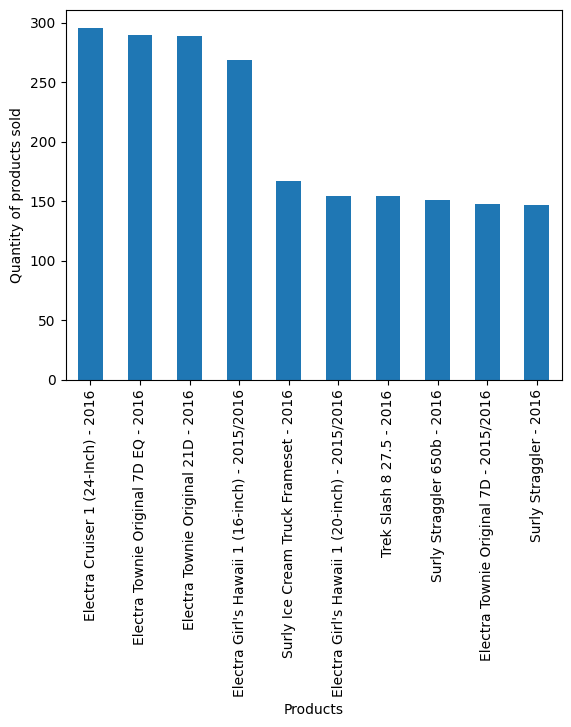

In [5]:
#Top 10 most sold products
top_products = order_items.merge(products, on = 'product_id')
top_10 = top_products.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)
print(top_10)


top_10.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Quantity of products sold')
plt.show()

product_name
Trek Slash 8 27.5 - 2016                 555558.6111
Trek Conduit+ - 2016                     389248.7025
Trek Fuel EX 8 29 - 2016                 368472.7294
Surly Straggler 650b - 2016              226765.5510
Trek Domane SLR 6 Disc - 2017            211584.6153
Surly Straggler - 2016                   203507.6200
Trek Remedy 29 Carbon Frameset - 2016    203380.8701
Trek Powerfly 8 FS Plus - 2017           188249.6235
Trek Madone 9.2 - 2017                   175899.6482
Trek Silque SLR 8 Women's - 2017         174524.7315
Name: revenue, dtype: float64


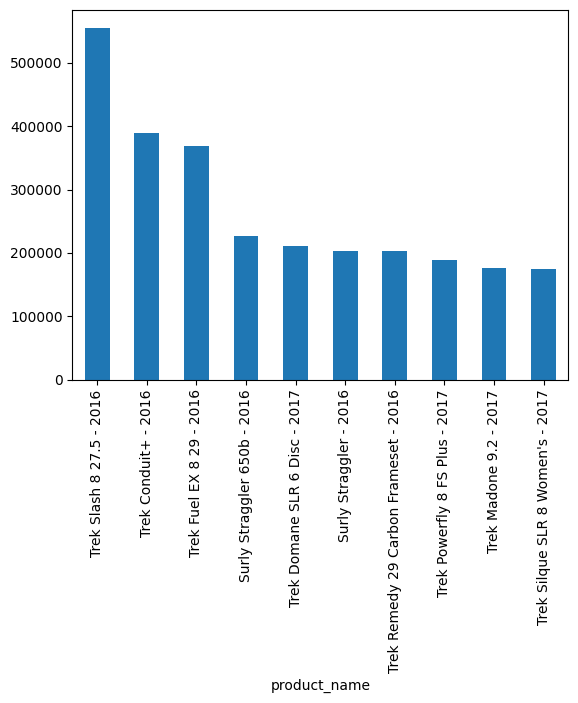

In [ ]:
#Top 10 products with most revenue
top_products = order_items.merge(products, on = 'product_id')
top_10_revenue = top_products.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)
print(top_10_revenue)

top_10_revenue.plot(kind = 'bar')
plt.show()

customer_id  first_name  last_name
94           Sharyn      Hopkins      34807.9392
10           Pamelia     Newman       33634.2604
75           Abby        Gamble       32803.0062
6            Lyndsey     Bean         32675.0725
16           Emmitt      Sanchez      31925.8857
Name: revenue, dtype: float64


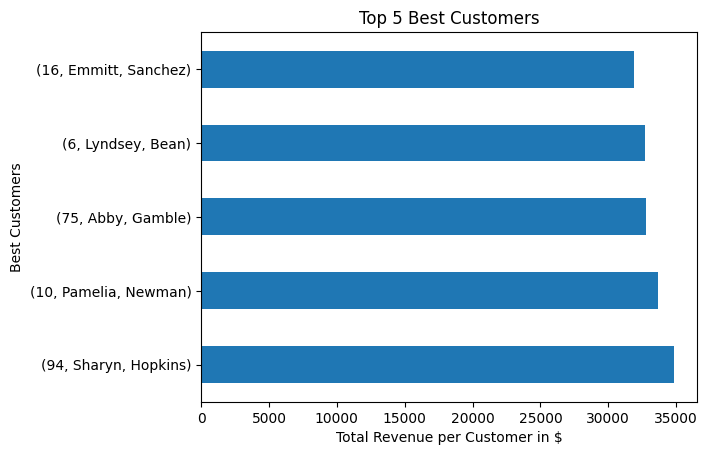

In [ ]:
#Top 5 Best Customers
top_customers = customers.merge(orders, on='customer_id') \
                        .merge(order_items, on='order_id')

top_customers['revenue'] = (top_customers['quantity'] * top_customers['list_price'] * (1 - top_customers['discount']))

top_5_customers = top_customers.groupby(['customer_id', 'first_name', 'last_name'])['revenue'].sum()\
                                .sort_values(ascending=False).head(5)

print(top_5_customers)
top_5_customers.plot(kind = 'barh')

plt.title('Top 5 Best Customers')
plt.xlabel('Total Revenue per Customer in $')
plt.ylabel('Best Customers')
plt.show()

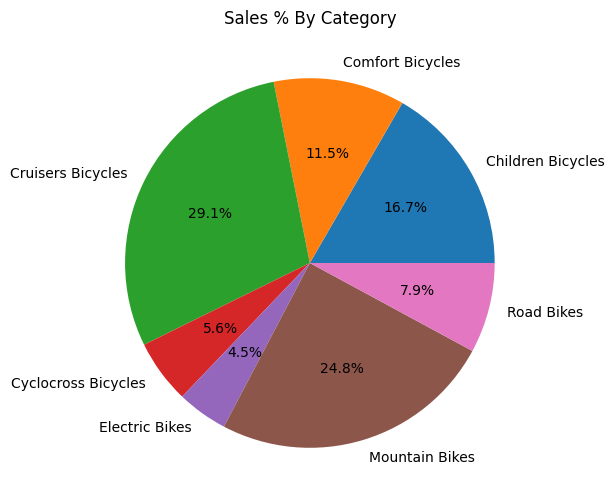

In [ ]:
#Sales percentage by category regarding the amount of items sold
category_merge = categories.merge(products, on = 'category_id')\
                            .merge(order_items, on = 'product_id')
categories_pie_chart = category_merge.groupby(['category_name'])['quantity'].sum()

plt.figure(figsize=(8,6))
#creation of a pie chart
plt.pie(categories_pie_chart.values, labels = categories_pie_chart.index, autopct = '%1.1f%%', startangle = 0)
plt.axis=('equal')
plt.title('Sales % By Category')
plt.show()

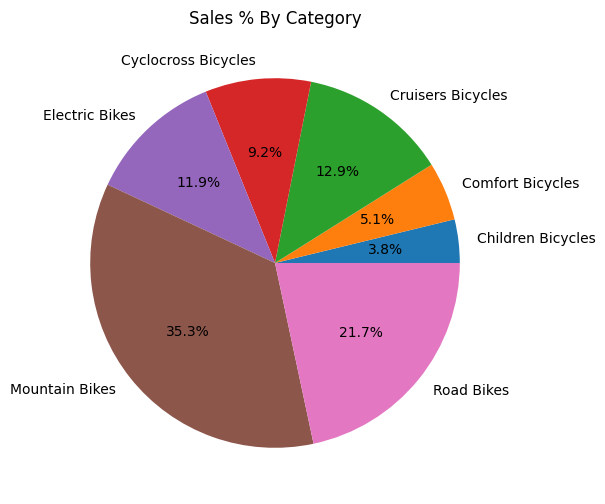

In [ ]:
#Sales percentage by category regarding the revenue made
category_merge = categories.merge(products, on = 'category_id')\
                            .merge(order_items, on = 'product_id')
categories_pie_chart = category_merge.groupby(['category_name'])['revenue'].sum()

plt.figure(figsize=(8,6))
#creation of a pie chart
plt.pie(categories_pie_chart.values, labels = categories_pie_chart.index, autopct = '%1.1f%%', startangle = 0)
plt.axis=('equal')
plt.title('Sales % By Category')
plt.show()

year_month
2016-01    215146.4241
2016-02    156112.3228
2016-03    180600.3285
2016-04    167144.0512
2016-05    205270.0091
2016-06    210562.1245
2016-07    199556.8089
2016-08    225657.3767
2016-09    273091.6097
2016-10    212078.0805
2016-11    182329.4124
2016-12    199829.9792
2017-01    285616.4840
2017-02    312923.7470
2017-03    308911.9018
2017-04    227290.9131
2017-05    268233.2379
2017-06    378865.6535
2017-07    229995.3979
2017-08    290553.4554
2017-09    293405.2561
2017-10    310328.3090
2017-11    281577.9019
2017-12    259505.9849
2018-01    381430.0993
2018-02    200658.0615
2018-03    363990.9935
2018-04    817921.8604
2018-06       188.9910
2018-07     11337.9002
2018-08      8377.8147
2018-09      8963.9647
2018-10      3781.1284
2018-11     11362.0071
2018-12      6516.9667
Freq: M, Name: revenue, dtype: float64


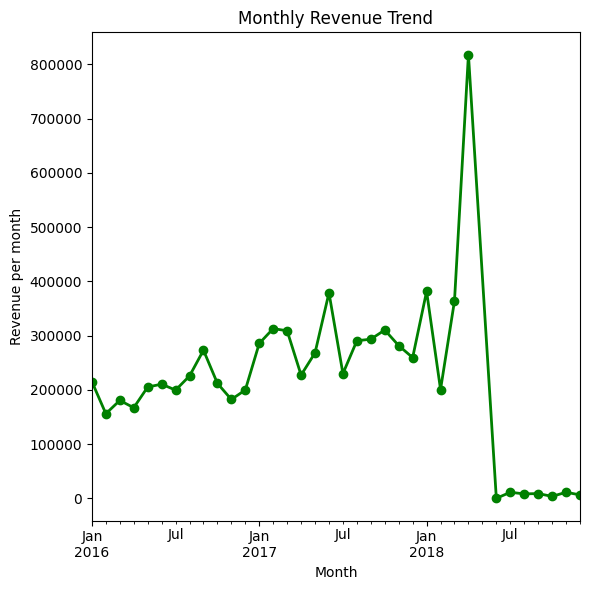

In [13]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders_revenue = orders.merge(order_items.groupby('order_id')['revenue'].sum(), on = 'order_id')
orders_revenue['year_month'] = orders_revenue['order_date'].dt.to_period('M')
monthly_revenue = orders_revenue.groupby('year_month')['revenue'].sum()
print(monthly_revenue)

plt.figure(figsize=(6,6))

monthly_revenue.plot(kind='line', marker = 'o', linewidth = 2, color = 'green')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue per month')
plt.tight_layout()
plt.show()

brand_name
Trek            4.602754e+06
Electra         1.205321e+06
Surly           9.495071e+05
Sun Bicycles    3.419949e+05
Haro            1.853846e+05
Heller          1.714591e+05
Pure Cycles     1.494763e+05
Ritchey         7.889895e+04
Strider         4.320479e+03
Name: revenue, dtype: float64


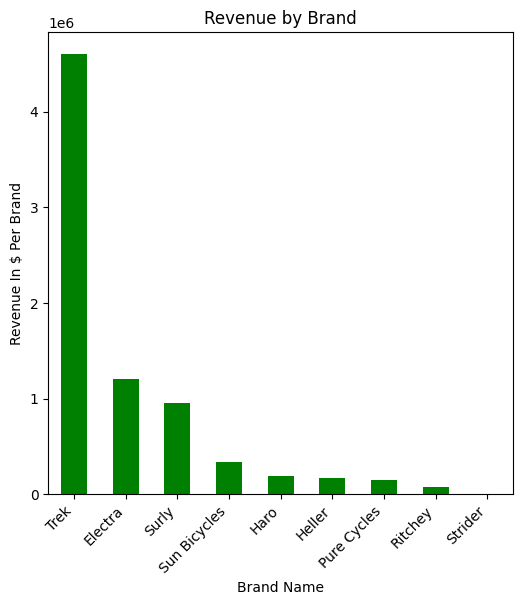

In [14]:
#Top Brands
#Top products with most revenue
top_brands = order_items.merge(products, on = 'product_id')\
                        .merge(brands, on = 'brand_id')
top_brands['revenue'] = (top_brands['quantity'] * top_brands['list_price_x'] * (1 - top_brands['discount']))
top_brands_10 = top_brands.groupby('brand_name')['revenue'].sum().sort_values(ascending=False).head(10)
print(top_brands_10)


plt.figure(figsize = (6,6))
top_brands_10.plot(kind='bar', color = 'green')
plt.xticks(rotation=45, ha='right')
plt.title('Revenue by Brand')
plt.xlabel('Brand Name')
plt.ylabel('Revenue In $ Per Brand')
plt.show()

In [ ]:
print("\n" + "="*60)
print("BIKE STORE - BUSINESS SUMMARY")
print("="*60)
print(f"Total Revenue:        ${total_revenue:,.2f}")
print(f"Total Orders:         {len(orders):,}")
print(f"Total Customers:      {len(customers):,}")
print(f"Average Order Value:  ${total_revenue/len(orders):,.2f}")
print(f"Total Products Sold:  {order_items['quantity'].sum():,} units")
print("="*60)


BIKE STORE - BUSINESS SUMMARY
Total Revenue:        $7,689,116.56
Total Orders:         1,615
Total Customers:      1,445
Average Order Value:  $4,761.06
Total Products Sold:  7,078 units
